In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#inspecting and loading of dataframe

df = pd.read_csv(r"C:\Users\LUPHEN\Documents\Kaggle Dataset\supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#identifying and handling for null values
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
#Checking for duplicates values
duplicate=df.drop_duplicates(inplace=True)
duplicate

In [6]:
#Finding more about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
#standardizing datatypes
df['Date']=pd.to_datetime(df['Date'])
df['Date'] 
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
df['Time']

0      13:08:00
1      10:29:00
2      13:23:00
3      20:33:00
4      10:37:00
         ...   
995    13:46:00
996    17:16:00
997    13:22:00
998    15:33:00
999    13:28:00
Name: Time, Length: 1000, dtype: object

In [8]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


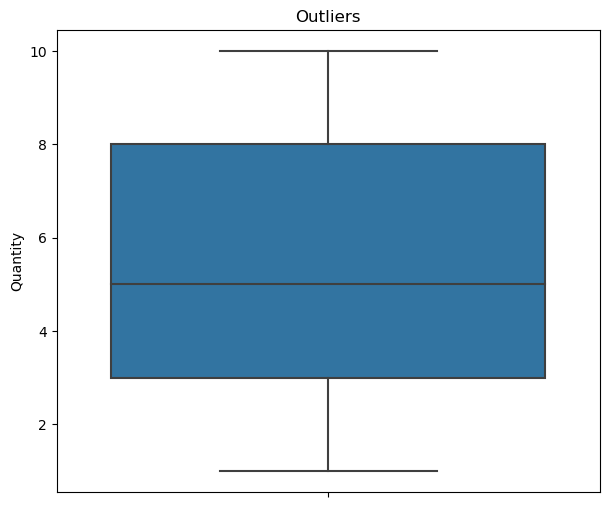

In [35]:
#Visualize column Quantity for outliers

plt.figure(figsize=(7,6))
sns.boxplot(data=df, y='Quantity')
plt.ylabel('Quantity')
plt.title('Outliers')
plt.show()

In [11]:
#1.	What is the distribution of sales across different branches?

#Grouping by branch and summing the Total sales
sales_distribution =df.groupby('Branch')['Total'].sum().round(2).sort_values().reset_index()

#Sorting the result by Total sales in descending order
sales_distribution_sorted=sales_distribution.sort_values('Total', ascending=False)
sales_distribution_sorted

,Branch,Total
2,C,110568.71
1,A,106200.37
0,B,106197.67


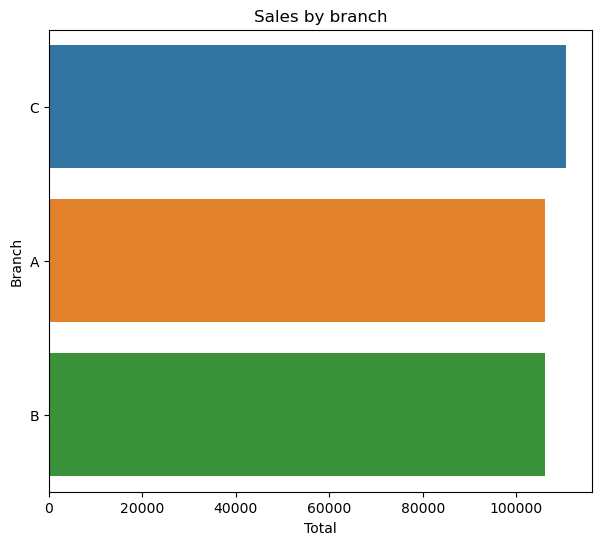

In [12]:
#Visualize the output code above

plt.figure(figsize=(7, 6))
sns.barplot(data=sales_distribution_sorted, x='Total', y='Branch')
plt.xlabel('Total')
plt.ylabel('Branch')
plt.title('Sales by branch')
plt.show()

In [13]:
#2.	How does customer type (member/normal) sales revenue varies across the dataset?

customer_sales_revenue =df.groupby('Customer type')['Total'].sum().round(2).reset_index()
customer_sales_revenue

,Customer type,Total
0,Member,164223.44
1,Normal,158743.30


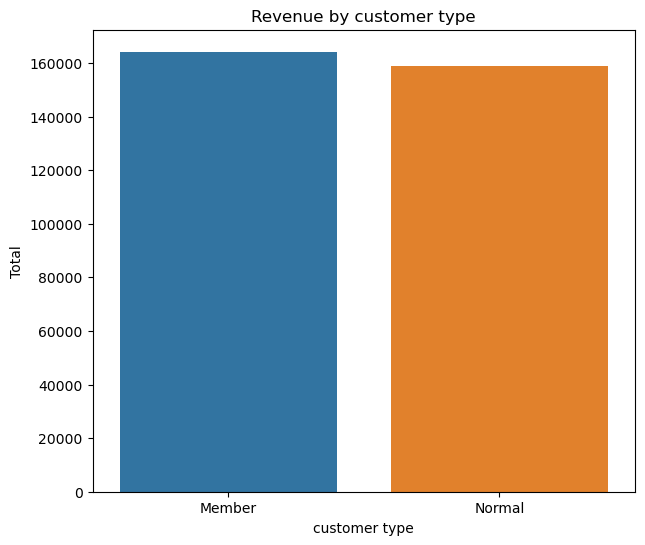

In [36]:
#Visualize the output code above

plt.figure(figsize=(7,6))
sns.barplot(data=customer_sales_revenue, x='Customer type',y='Total')
plt.xlabel('customer type')
plt.ylabel('Total')
plt.title('Revenue by customer type')
plt.show()

In [15]:
3.	What is the average gross income for each product line?

gross_income=df.groupby('Product line')['gross income'].mean().round(2).reset_index()
gross_income_sorted=gross_income.sort_values('gross income',ascending=False)
gross_income_sorted

Object `line` not found.


,Product line,gross income
4,Home and lifestyle,16.03
5,Sports and travel,15.81
3,Health and beauty,15.41
2,Food and beverages,15.37
0,Electronic accessories,15.22
1,Fashion accessories,14.53


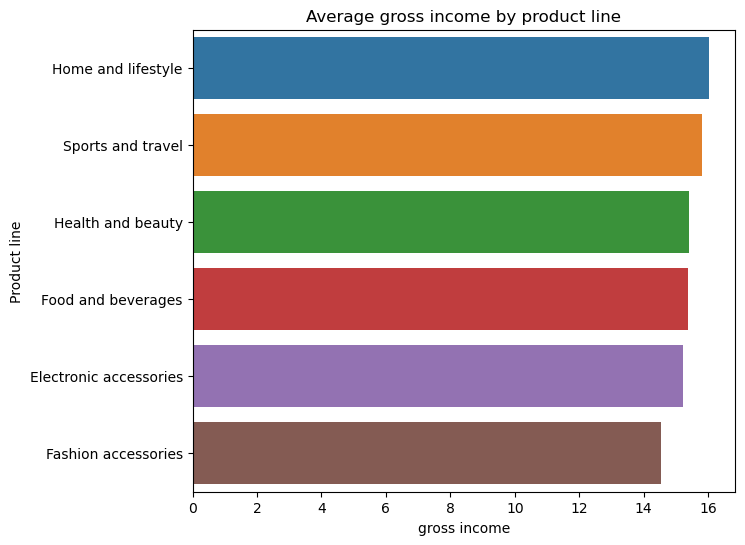

In [37]:
plt.figure(figsize=(7,6))
sns.barplot(data=gross_income_sorted,x='gross income',y='Product line')
plt.title('Average gross income by product line')
plt.show()

In [17]:
#4.What month has the best revenue income?

# Extract month from 'Date' column
df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%b')
df['Month']
monthly_sales = df.groupby('Month')['Total'].sum().round(2).reset_index()
monthly_sales 

,Month,Total
0,Feb,97219.37
1,Jan,116291.87
2,Mar,109455.51


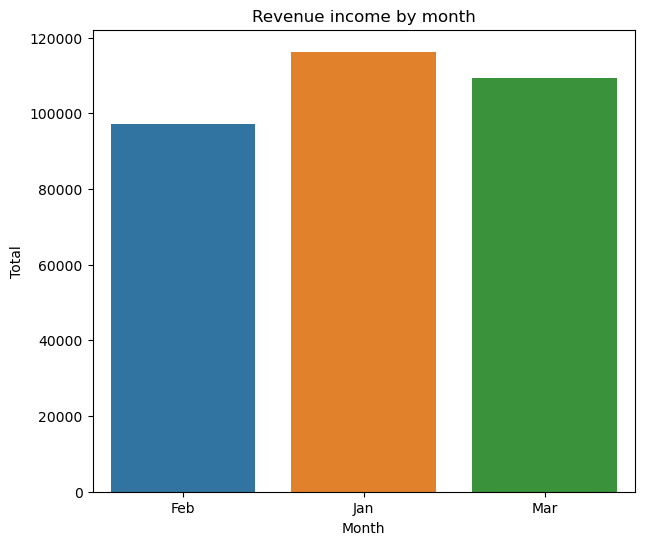

In [38]:
plt.figure(figsize=(7,6))
sns.barplot(monthly_sales, x='Month', y='Total')
plt.title('Revenue income by month')
plt.show()

In [19]:
#5.Find payment type with the most revenue.

Payment_revenue=df.groupby('Payment')['Total'].sum().round(2).reset_index()
Payment_revenue_sorted=Payment_revenue.sort_values('Total',ascending=False)
Payment_revenue_sorted

,Payment,Total
0,Cash,112206.57
2,Ewallet,109993.11
1,Credit card,100767.07


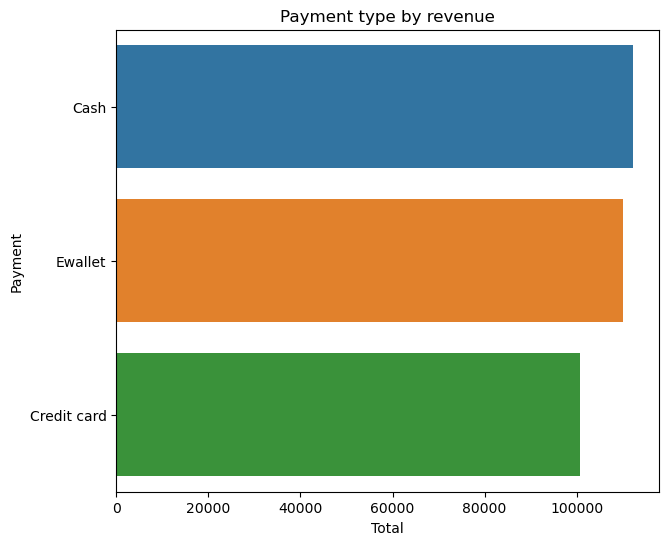

In [39]:
plt.figure(figsize=(7,6))
sns.barplot(Payment_revenue_sorted,x='Total',y='Payment')
plt.title('Payment type by revenue')
plt.show()

In [21]:
#6.Find the correction relationship between cogs,gross income,Rating,Unit price,Quantity and Tax 5%.

corr_Relationship = df[['cogs','gross income','Rating','Unit price','Quantity','Tax 5%']].corr()
corr_Relationship

,cogs,gross income,Rating,Unit price,Quantity,Tax 5%
cogs,1.000000,1.000000,-0.036442,0.633962,0.705510,1.000000
gross income,1.000000,1.000000,-0.036442,0.633962,0.705510,1.000000
Rating,-0.036442,-0.036442,1.000000,-0.008778,-0.015815,-0.036442
Unit price,0.633962,0.633962,-0.008778,1.000000,0.010778,0.633962
Quantity,0.705510,0.705510,-0.015815,0.010778,1.000000,0.705510
Tax 5%,1.000000,1.000000,-0.036442,0.633962,0.705510,1.000000


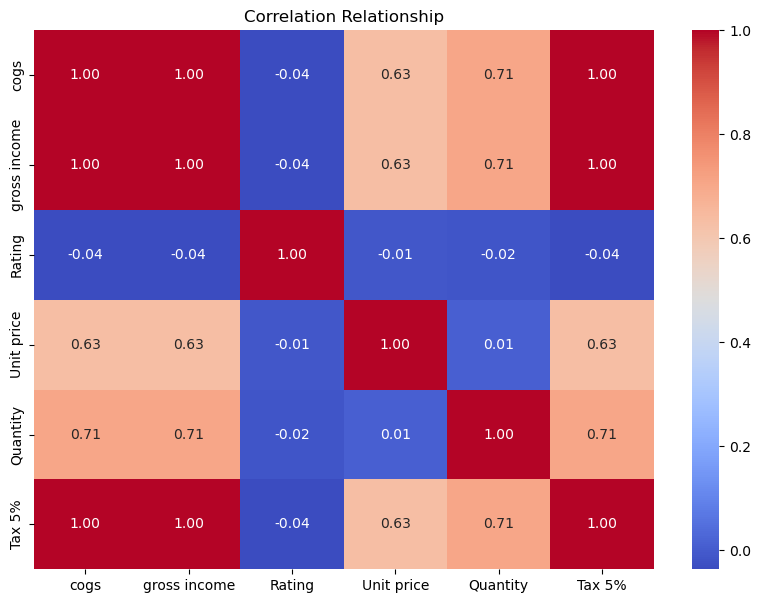

In [41]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_Relationship, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Relationship')
plt.show()

In [23]:
#Renaming columns 

df.rename(columns={'cogs': 'Cogs', 'gross margin percentage': 'Gross Margin Percentage', 'gross income': 'Gross Income'}, inplace=True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cogs,Gross Margin Percentage,Gross Income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Jan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Mar
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Mar
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Jan
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Jan
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Mar
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,Feb
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1,Feb


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [70]:
#7.What is the percentage gender demographic across the dataset?
total_gender=df['Gender'].size
gender_demographic=(df.groupby('Gender').size()/total_gender*100).round(2)
gender_demographic

Gender
Female    50.1
Male      49.9
dtype: float64

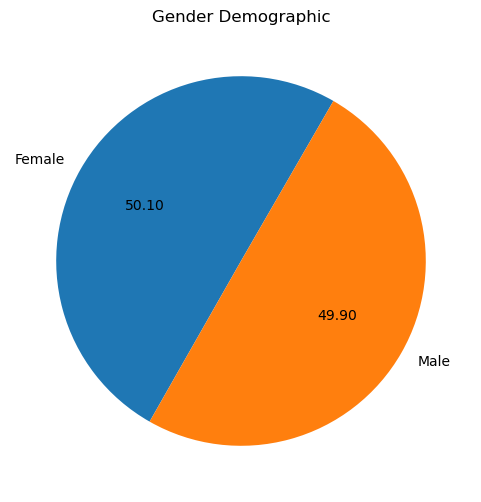

In [50]:
plt.figure(figsize=(7,6))
gender_demographic.plot(kind='pie',autopct='%.2f',startangle= 60)
plt.title('Gender Demographic')
plt.show()


In [27]:
#8.What is the average rating for each product lines?

product_line_rating = df['Rating'].groupby(df['Product line']).mean().round(2).reset_index()
product_line_rating_sorted=product_line_rating.sort_values('Rating',ascending=False)
product_line_rating_sorted

,Product line,Rating
2,Food and beverages,7.11
1,Fashion accessories,7.03
3,Health and beauty,7.00
0,Electronic accessories,6.92
5,Sports and travel,6.92
4,Home and lifestyle,6.84


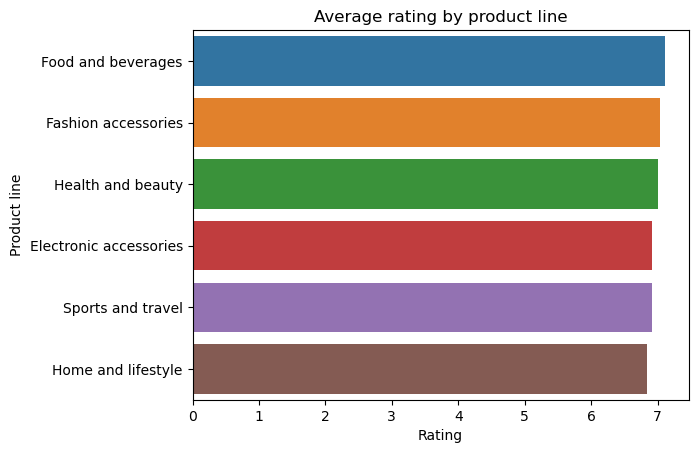

In [52]:
sns.barplot(product_line_rating_sorted,x='Rating',y='Product line')
plt.title('Average rating by product line')
plt.show()
         

In [29]:
#9.What city has the best order quantity?
city_order_quantity=df.groupby('City')['Quantity'].size()
city_order_quantity


City
Mandalay     332
Naypyitaw    328
Yangon       340
Name: Quantity, dtype: int64

Text(0.5, 1.0, 'City Sales')

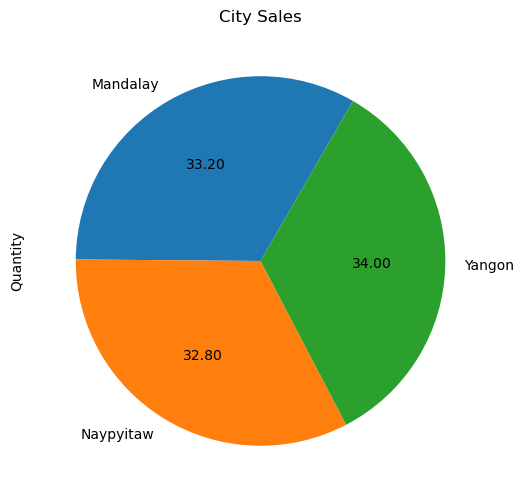

In [53]:
plt.figure(figsize=(7,6))
city_order_quantity.plot(kind='pie',autopct='%.2f',startangle= 60)
plt.title('City Sales')


In [62]:
#10.Which product lines have the highest and lowest percentage sales volumes?

total_sales = df['Total'].sum()
product_line_sales_percentage = (df.groupby('Product line')['Total'].sum() / total_sales * 100).round(2)
sorted_product_line=product_line_sales_percentage.sort_values(ascending=False)
sorted_product_line


Product line
Food and beverages        17.38
Sports and travel         17.07
Electronic accessories    16.82
Fashion accessories       16.81
Home and lifestyle        16.68
Health and beauty         15.23
Name: Total, dtype: float64

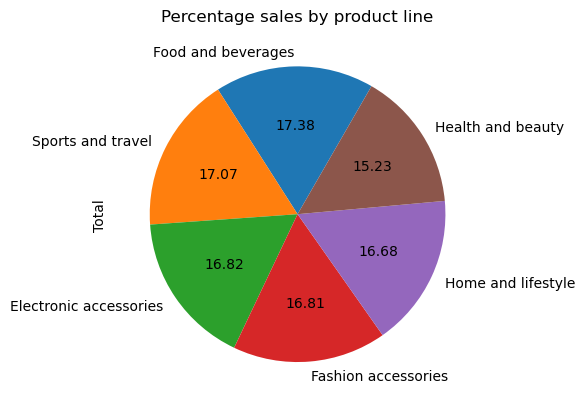

In [65]:
sorted_product_line.plot(kind='pie',autopct='%.2f',startangle= 60)
plt.title('Percentage sales by product line')
plt.show()